In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive

drive.mount('/content/drive')

path = 'drive/MyDrive/MUIA/TFM/'


Mounted at /content/drive


In [2]:
#reads the csv
stocks = pd.read_excel(f'{path}/data/stocks_spain.xlsx')
stocks.drop(columns=stocks.columns[0], axis=1, inplace=True)
stocks.head()

,Date,A3M,ACS,ALB,AMS,AENA,ACX,ALM,APPS,ANA,...,SAN,SCYR,ROVI,SLR,TEF,TL5,TLGO,UNI,VIS,VID
0,2018-01-02,8.710,32.255001,48.349998,60.220001,170.500000,12.085,8.348511,11.22,68.459999,...,5.226751,2.500,15.65,1.66,8.191,9.400,4.397,1.290,54.700001,66.521370
1,2018-01-03,8.665,32.470001,49.299999,60.500000,172.399994,12.280,8.539362,11.23,68.800003,...,5.227709,2.459,16.00,1.92,8.166,9.432,4.430,1.310,55.000000,66.286316
2,2018-01-04,8.770,33.490002,49.750000,61.820000,175.399994,12.295,8.612767,11.43,70.400002,...,5.403084,2.553,15.60,1.96,8.295,9.574,4.470,1.320,55.599998,66.286316
3,2018-01-05,8.865,33.939999,50.299999,63.500000,177.350006,12.290,8.563830,11.57,71.139999,...,5.438543,2.572,15.80,2.04,8.358,9.830,4.450,1.315,56.500000,66.599724
4,2018-01-08,8.750,33.650002,49.700001,62.959999,178.250000,12.355,8.632341,11.54,71.059998,...,5.454834,2.600,15.85,2.27,8.370,9.570,4.405,1.307,56.150002,66.443016


Seleccionar una fecha sobre la que hacer análisis (borraremos los datos posteriores a esa fecha)

In [3]:
# Crahs inicio covid: '2020-02-09'

# convert date column to datetime format
stocks['Date'] = pd.to_datetime(stocks['Date'])

# define the date to filter on
filter_date = '2020-02-09'

# filter the dataframe to keep rows before the filter date
stocks_filter = stocks[stocks['Date'] <= filter_date]

# print the resulting dataframe
print(stocks_filter)

          Date    A3M        ACS        ALB        AMS        AENA     ACX  \
0   2018-01-02  8.710  32.255001  48.349998  60.220001  170.500000  12.085   
1   2018-01-03  8.665  32.470001  49.299999  60.500000  172.399994  12.280   
2   2018-01-04  8.770  33.490002  49.750000  61.820000  175.399994  12.295   
3   2018-01-05  8.865  33.939999  50.299999  63.500000  177.350006  12.290   
4   2018-01-08  8.750  33.650002  49.700001  62.959999  178.250000  12.355   
..         ...    ...        ...        ...        ...         ...     ...   
532 2020-02-03  3.042  29.559999  45.349998  72.180000  168.500000   8.862   
533 2020-02-04  3.038  29.780001  45.650002  74.419998  169.000000   9.060   
534 2020-02-05  3.094  30.450001  46.049999  73.940002  171.100006   9.396   
535 2020-02-06  3.090  30.150000  45.900002  74.660004  170.000000   9.640   
536 2020-02-07  3.058  30.520000  45.599998  73.320000  169.149994   9.414   

           ALM   APPS         ANA  ...       SAN   SCYR       R

In [4]:
# Calculate returns
logreturn = np.log(stocks_filter.iloc[:,1:]).diff()
logreturn = logreturn.iloc[1: , :]
logreturn

,A3M,ACS,ALB,AMS,AENA,ACX,ALM,APPS,ANA,BBVA,...,SAN,SCYR,ROVI,SLR,TEF,TL5,TLGO,UNI,VIS,VID
1,-0.005180,0.006644,0.019458,0.004639,0.011082,0.016007,0.022603,0.000891,0.004954,0.001693,...,0.000183,-0.016536,0.022118,0.145508,-0.003057,0.003399,0.007477,0.015385,0.005469,-0.003540
2,0.012045,0.030930,0.009086,0.021584,0.017252,0.001221,0.008559,0.017653,0.022989,0.017744,...,0.032997,0.037514,-0.025318,0.020619,0.015674,0.014943,0.008989,0.007605,0.010850,0.000000
3,0.010774,0.013347,0.010995,0.026813,0.011056,-0.000407,-0.005698,0.012174,0.010456,0.004422,...,0.006541,0.007415,0.012739,0.040005,0.007566,0.026388,-0.004484,-0.003795,0.016057,0.004717
4,-0.013057,-0.008581,-0.012000,-0.008540,0.005062,0.005275,0.007968,-0.002596,-0.001125,-0.002485,...,0.002991,0.010828,0.003160,0.106830,0.001435,-0.026806,-0.010164,-0.006102,-0.006214,-0.002356
5,-0.005731,0.005630,0.010010,0.011371,0.005036,-0.004055,0.041638,0.001732,-0.015029,0.003725,...,0.001755,-0.005399,-0.015899,-0.017778,0.000358,-0.001464,-0.010268,-0.002298,0.008865,0.002356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,-0.005246,-0.015775,-0.009874,0.019022,0.008044,0.006794,0.015608,-0.008617,-0.011788,-0.000750,...,0.002389,-0.019494,0.004008,-0.006530,0.000164,0.001816,-0.006723,0.007735,0.026679,-0.010363
533,-0.001316,0.007415,0.006593,0.030562,0.002963,0.022097,0.017544,0.033100,0.005911,0.025503,...,0.035435,0.009404,0.027615,0.004753,0.010906,0.003823,0.008396,-0.008845,0.017465,-0.002086
534,0.018265,0.022249,0.008724,-0.006471,0.012350,0.036415,0.007220,0.004640,0.027133,0.029140,...,0.027523,0.007770,-0.007813,0.019372,-0.002918,0.018506,-0.020271,-0.002780,-0.008996,0.000000
535,-0.001294,-0.009901,-0.003263,0.009691,-0.006450,0.025637,-0.013763,0.008299,0.007619,0.034510,...,0.009444,-0.000774,0.015565,-0.002328,0.010177,0.003543,0.005106,0.009421,-0.012528,0.018615


In [5]:
#craetes a correlation matrix
cor_matrix = logreturn.corr()
#shows the first 5 rows
cor_matrix.head()

,A3M,ACS,ALB,AMS,AENA,ACX,ALM,APPS,ANA,BBVA,...,SAN,SCYR,ROVI,SLR,TEF,TL5,TLGO,UNI,VIS,VID
A3M,1.000000,0.301616,0.163583,0.185428,0.149107,0.262875,0.181231,0.252511,0.117563,0.238386,...,0.300365,0.292386,0.005626,0.147862,0.261620,0.646479,0.108841,0.251955,0.184526,0.139679
ACS,0.301616,1.000000,0.314858,0.396821,0.381835,0.375762,0.253825,0.321243,0.345552,0.397427,...,0.484515,0.420243,0.068751,0.164636,0.433065,0.337800,0.199074,0.247017,0.278728,0.144485
ALB,0.163583,0.314858,1.000000,0.275255,0.227135,0.292114,0.208408,0.330092,0.196062,0.296849,...,0.332243,0.284509,0.066307,0.091209,0.209059,0.151316,0.107945,0.269887,0.179726,0.109531
AMS,0.185428,0.396821,0.275255,1.000000,0.319240,0.406780,0.284979,0.381476,0.265149,0.281422,...,0.323814,0.280492,0.139181,0.167827,0.309450,0.241559,0.198810,0.195462,0.287775,0.117813
AENA,0.149107,0.381835,0.227135,0.319240,1.000000,0.234410,0.238455,0.258398,0.356893,0.284601,...,0.340107,0.262547,0.068191,0.074822,0.321840,0.268940,0.150935,0.177248,0.225496,0.098088


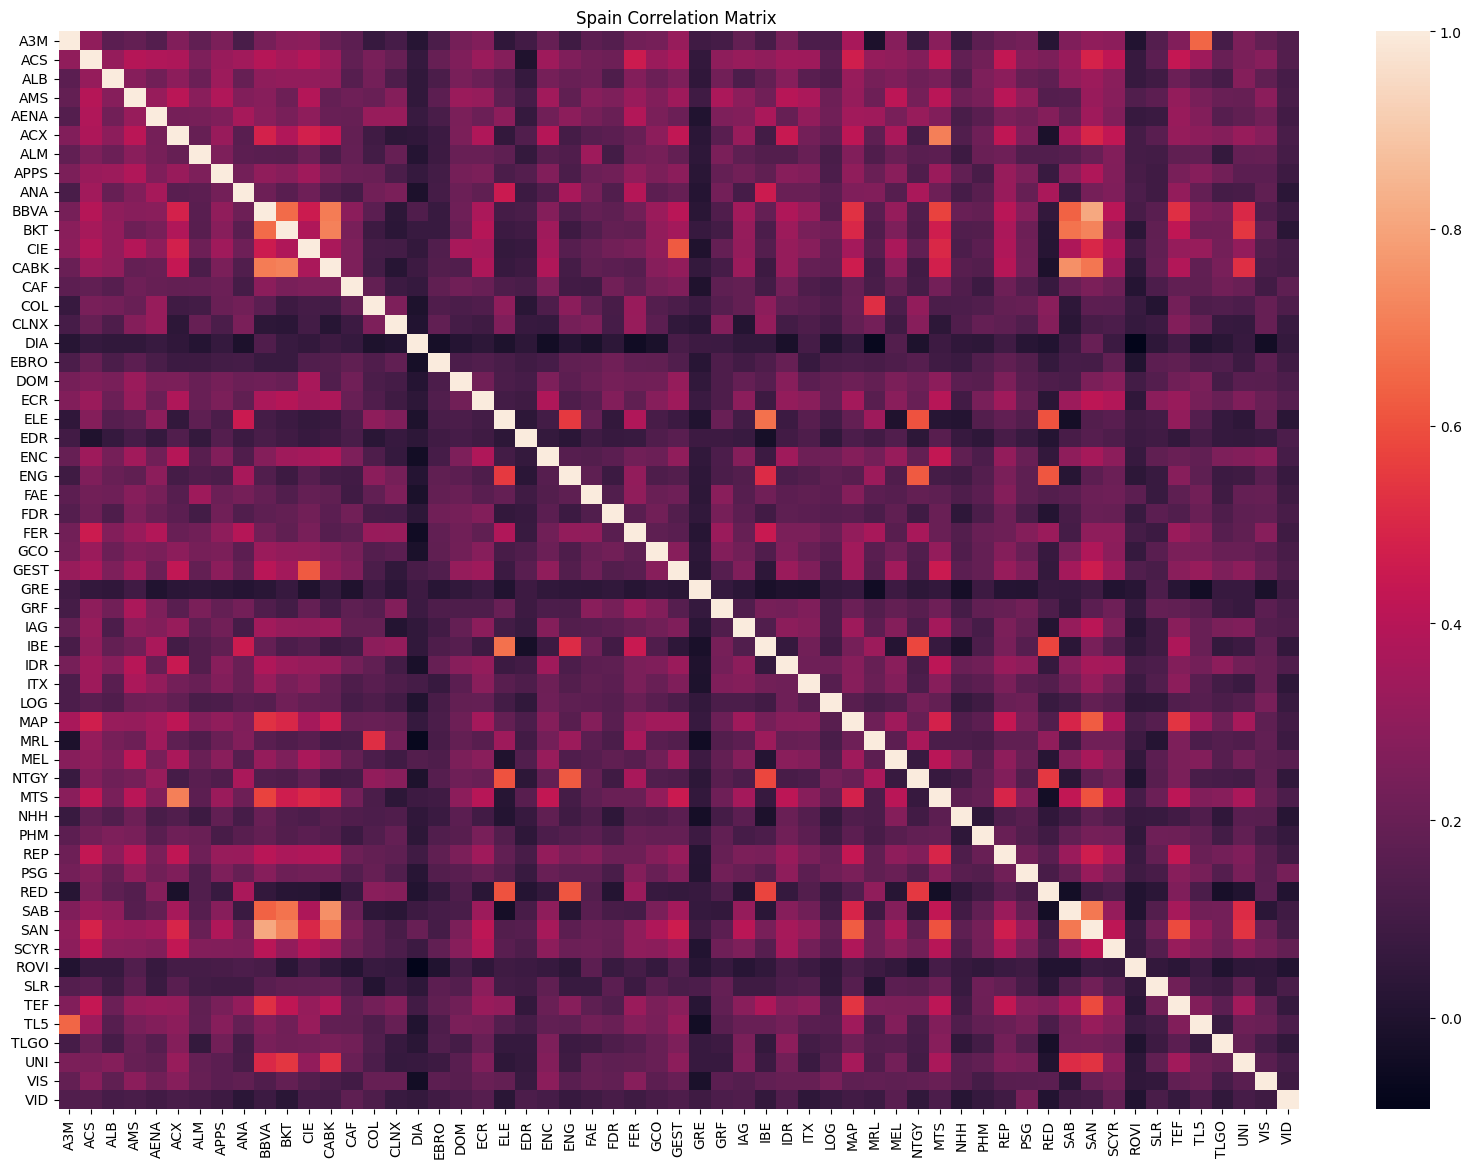

In [6]:
plt.figure(figsize=(20, 14))
sns.heatmap(cor_matrix, annot=False)
plt.title("Spain Correlation Matrix ")
plt.show()

In [7]:
#extracts the indices from the correlation matrix, which are the stocks
corInd_matrix = stocks.iloc[:,1:].corr()
stocks = corInd_matrix.index.values
stocks

array(['A3M', 'ACS', 'ALB', 'AMS', 'AENA', 'ACX', 'ALM', 'APPS', 'ANA',
       'BBVA', 'BKT', 'CIE', 'CABK', 'CAF', 'COL', 'CLNX', 'DIA', 'EBRO',
       'DOM', 'ECR', 'ELE', 'EDR', 'ENC', 'ENG', 'FAE', 'FDR', 'FER',
       'GCO', 'GEST', 'GRE', 'GRF', 'IAG', 'IBE', 'IDR', 'ITX', 'LOG',
       'MAP', 'MRL', 'MEL', 'NTGY', 'MTS', 'NHH', 'PHM', 'REP', 'PSG',
       'RED', 'SAB', 'SAN', 'SCYR', 'ROVI', 'SLR', 'TEF', 'TL5', 'TLGO',
       'UNI', 'VIS', 'VID'], dtype=object)

In [8]:
#Changes from dataframe to matrix, so it is easier to create a graph with networkx
cor_matrix = np.asmatrix(cor_matrix)
print(cor_matrix)

[[1.         0.30161599 0.1635831  ... 0.25195486 0.18452558 0.13967868]
 [0.30161599 1.         0.31485849 ... 0.24701734 0.27872836 0.14448529]
 [0.1635831  0.31485849 1.         ... 0.26988745 0.17972633 0.10953129]
 ...
 [0.25195486 0.24701734 0.26988745 ... 1.         0.159562   0.10850907]
 [0.18452558 0.27872836 0.17972633 ... 0.159562   1.         0.08662902]
 [0.13967868 0.14448529 0.10953129 ... 0.10850907 0.08662902 1.        ]]


In [9]:
from networkx.classes.function import edges
#Crates graph using the data of the correlation matrix
G = nx.from_numpy_array(cor_matrix)

#relabels the nodes to match the stocks names
G = nx.relabel_nodes(G,lambda x: stocks[x])

In [10]:
G.nodes

NodeView(('A3M', 'ACS', 'ALB', 'AMS', 'AENA', 'ACX', 'ALM', 'APPS', 'ANA', 'BBVA', 'BKT', 'CIE', 'CABK', 'CAF', 'COL', 'CLNX', 'DIA', 'EBRO', 'DOM', 'ECR', 'ELE', 'EDR', 'ENC', 'ENG', 'FAE', 'FDR', 'FER', 'GCO', 'GEST', 'GRE', 'GRF', 'IAG', 'IBE', 'IDR', 'ITX', 'LOG', 'MAP', 'MRL', 'MEL', 'NTGY', 'MTS', 'NHH', 'PHM', 'REP', 'PSG', 'RED', 'SAB', 'SAN', 'SCYR', 'ROVI', 'SLR', 'TEF', 'TL5', 'TLGO', 'UNI', 'VIS', 'VID'))

In [11]:
'''
plt.subplots(figsize=(13,13))

nx.draw_shell(G,with_labels =True, node_color = 'pink',node_size =500, edge_color = 'purple')

plt.title("Spain Correlation Networks")

plt.show()
'''

'\nplt.subplots(figsize=(13,13))\n\nnx.draw_shell(G,with_labels =True, node_color = \'pink\',node_size =500, edge_color = \'purple\')\n\nplt.title("Spain Correlation Networks")\n\nplt.show()\n'

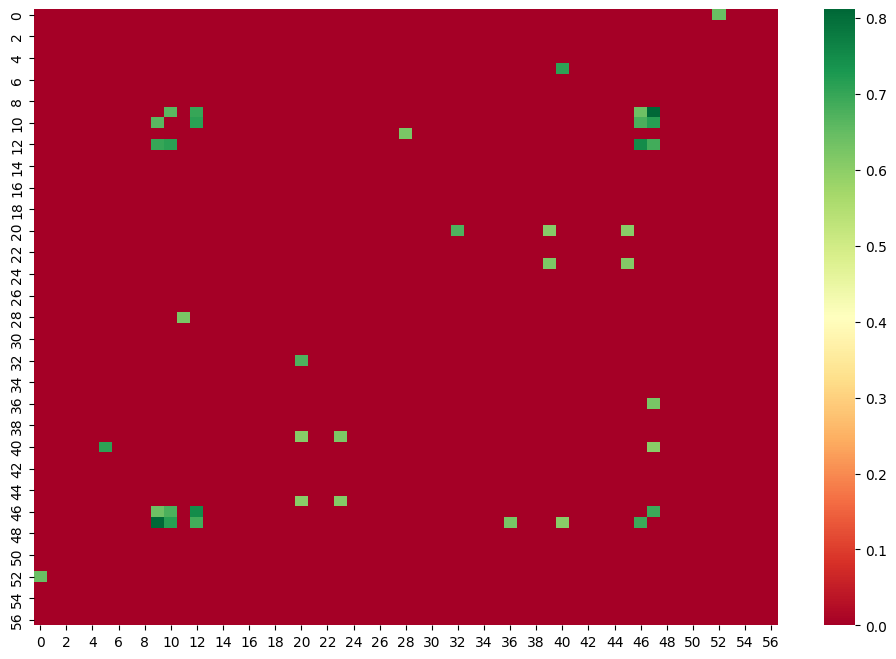

In [12]:
umbral = 0.6

#build new matrix
matrix_new = np.array(cor_matrix)  
#use np.where as filter with the below conditions
positive_corr = np.where(((matrix_new > umbral) & (matrix_new < 1.0)), matrix_new, 0)
negative_corr = np.where(matrix_new < 0, matrix_new, 0)

plt.figure(figsize=(12, 8))
sns.heatmap(positive_corr, annot=False, cmap='RdYlGn')
plt.show()

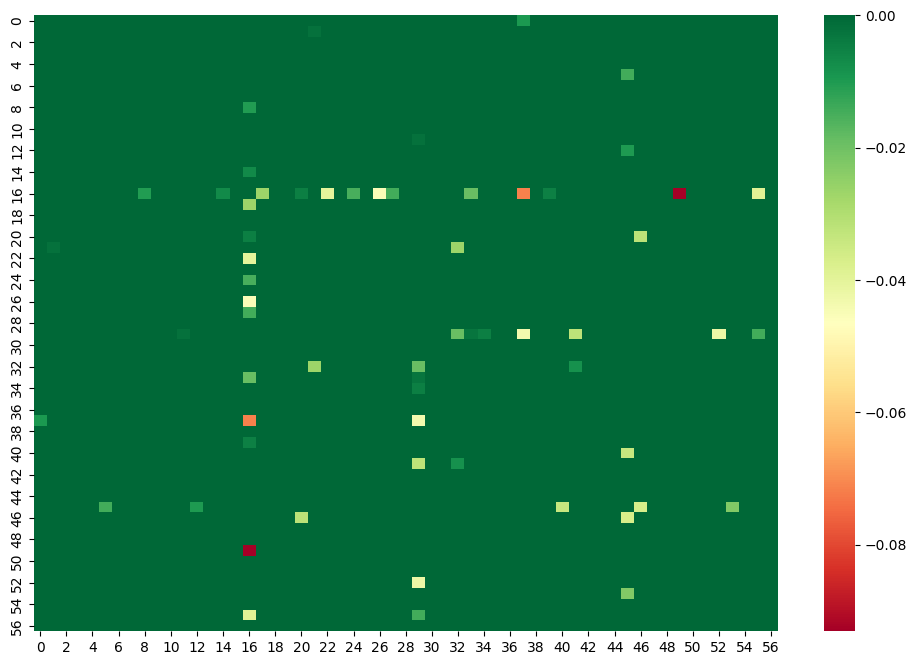

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(negative_corr, annot=False, cmap='RdYlGn')
plt.show()

In [14]:
import math

# vfunc permite obtener la distancia a partir de las correlaciones 

distance = lambda c:  math.sqrt(2*(1-c))
vfunc = np.vectorize(distance)
distances = vfunc(positive_corr)
print(distances)

# Filtramos para representar solo aquellas distancias inferiores a min_distance
max_distance = math.sqrt(2*(1-umbral))
print(f'max_distance = {max_distance}')
positive_dist = np.where((distances < max_distance), distances, 0)
print(positive_dist)

[[1.41421356 1.41421356 1.41421356 ... 1.41421356 1.41421356 1.41421356]
 [1.41421356 1.41421356 1.41421356 ... 1.41421356 1.41421356 1.41421356]
 [1.41421356 1.41421356 1.41421356 ... 1.41421356 1.41421356 1.41421356]
 ...
 [1.41421356 1.41421356 1.41421356 ... 1.41421356 1.41421356 1.41421356]
 [1.41421356 1.41421356 1.41421356 ... 1.41421356 1.41421356 1.41421356]
 [1.41421356 1.41421356 1.41421356 ... 1.41421356 1.41421356 1.41421356]]
max_distance = 0.8944271909999159
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [15]:
from networkx.classes.function import edges
#Crates graph using the data of the correlation matrix
G_positive = nx.from_numpy_array(positive_dist)

#relabels the nodes to match the  stocks names
G_positive = nx.relabel_nodes(G_positive,lambda x: stocks[x])

In [16]:
G_positive.adj

AdjacencyView({'A3M': {'TL5': {'weight': 0.8408582952435747}}, 'ACS': {}, 'ALB': {}, 'AMS': {}, 'AENA': {}, 'ACX': {'MTS': {'weight': 0.7631345931286733}}, 'ALM': {}, 'APPS': {}, 'ANA': {}, 'BBVA': {'BKT': {'weight': 0.8224181715552819}, 'CABK': {'weight': 0.7761954529411919}, 'SAB': {'weight': 0.8514820279299021}, 'SAN': {'weight': 0.6134918311773085}}, 'BKT': {'BBVA': {'weight': 0.8224181715552819}, 'CABK': {'weight': 0.756972929382915}, 'SAB': {'weight': 0.8026706443252382}, 'SAN': {'weight': 0.7542187194569666}}, 'CIE': {'GEST': {'weight': 0.8684295680679502}}, 'CABK': {'BBVA': {'weight': 0.7761954529411919}, 'BKT': {'weight': 0.756972929382915}, 'SAB': {'weight': 0.7081659787968045}, 'SAN': {'weight': 0.7935608134428508}}, 'CAF': {}, 'COL': {}, 'CLNX': {}, 'DIA': {}, 'EBRO': {}, 'DOM': {}, 'ECR': {}, 'ELE': {'IBE': {'weight': 0.8062595735123629}, 'NTGY': {'weight': 0.8877691014360596}, 'RED': {'weight': 0.888778130246033}}, 'EDR': {}, 'ENC': {}, 'ENG': {'NTGY': {'weight': 0.870689

In [17]:
# get a list of nodes with no edges
isolates = list(nx.isolates(G_positive))

# remove the isolated nodes from the graph
G_positive.remove_nodes_from(isolates)

In [18]:
# Compute the sum of weights for each node
node_weights = {}
for node in G_positive.nodes():
    node_weights[node] = sum([edge[2]['weight'] for edge in G_positive.edges(node, data=True)])

# Normalize the sum of weights for each node
total_weight = sum(node_weights.values())
for node in node_weights:
    node_weights[node] /= total_weight

# Set the size of each node proportional to its normalized sum of weights
node_sizes = [node_weights[node]*30000 for node in G_positive.nodes()]

# Adjust the layout
pos = nx.kamada_kawai_layout(G_positive)





In [19]:
from pandas.core.arrays.categorical import CategoricalAccessor
# Define the categories of each node
tickers = pd.read_excel(f'{path}/data/tickers.xlsx')

# Discard columns that are not necessary
tickers = tickers.loc[:,'Simbolo':'Sector']
tickers['Simbolo'] = tickers['Simbolo'].str.slice(stop=-3)
#print(tickers)

# Create a dictionary where each row represents a key-value pair
ticker_category = dict(zip(tickers['Simbolo'], tickers['Sector']))
print(f'Ticker category: {ticker_category}')

# Get a list of all possible values of the values of the dictionary
node_categories = list(set(ticker_category.values()))
print(f'Node categories: {node_categories}')

# Define a color map for each category
category_colors = {'Petrol and Power': 'red', 'Technology and Telecommunications': 'blue', 'Financial Services':'brown', 'Consumer Goods':'green', 'Consumer Services':'yellow', 'Real Estate Services':'grey', 'Basic Mat., Industry and Construction':'orange'}

# Create a list of colors for each node
node_colors = [category_colors[ticker_category[n]] for n in G_positive.nodes()]


Ticker category: {'A3M': 'Consumer Services', 'ACS': 'Basic Mat., Industry and Construction', 'ACX': 'Basic Mat., Industry and Construction', 'AENA': 'Consumer Services', 'ALB': 'Financial Services', 'ALM': 'Consumer Goods', 'AMS': 'Technology and Telecommunications', 'ANA': 'Basic Mat., Industry and Construction', 'APPS': 'Basic Mat., Industry and Construction', 'BBVA': 'Financial Services', 'BKT': 'Financial Services', 'CABK': 'Financial Services', 'CAF': 'Basic Mat., Industry and Construction', 'CIE': 'Basic Mat., Industry and Construction', 'CLNX': 'Technology and Telecommunications', 'COL': 'Real Estate Services', 'DIA': 'Consumer Services', 'DOM': 'Technology and Telecommunications', 'EBRO': 'Consumer Goods', 'ECR': 'Basic Mat., Industry and Construction', 'EDR': 'Consumer Services', 'ELE': 'Petrol and Power', 'ENC': 'Consumer Goods', 'ENG': 'Petrol and Power', 'FAE': 'Consumer Goods', 'FDR': 'Basic Mat., Industry and Construction', 'FER': 'Basic Mat., Industry and Construction',

In [20]:
#Revisar por que las que no pinto aristas no tienen color #################

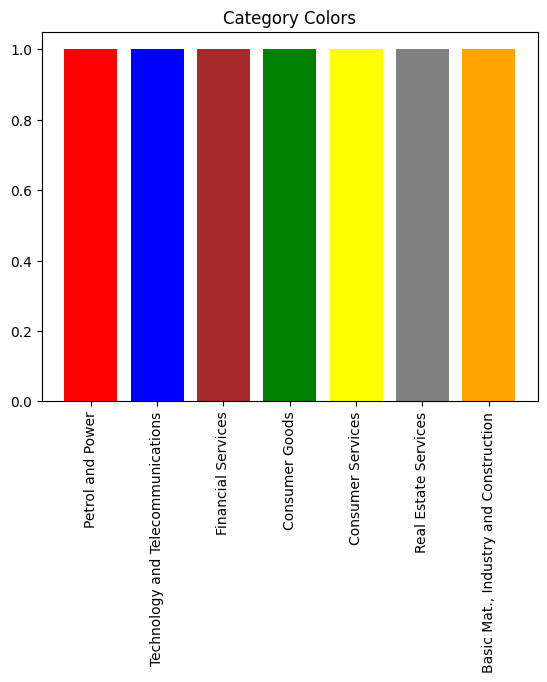

In [21]:
# Create a list of the categories and colors
categories = list(category_colors.keys())
colors = list(category_colors.values())

# Create a bar plot with a rectangle for each color
fig, ax = plt.subplots()
for i in range(len(colors)):
    ax.bar(i, 1, color=colors[i])

# Set the tick labels and title
ax.set_xticks(range(len(categories)))
ax.set_xticklabels(categories, rotation=90)
ax.set_title('Category Colors')

# Show the plot
plt.show()

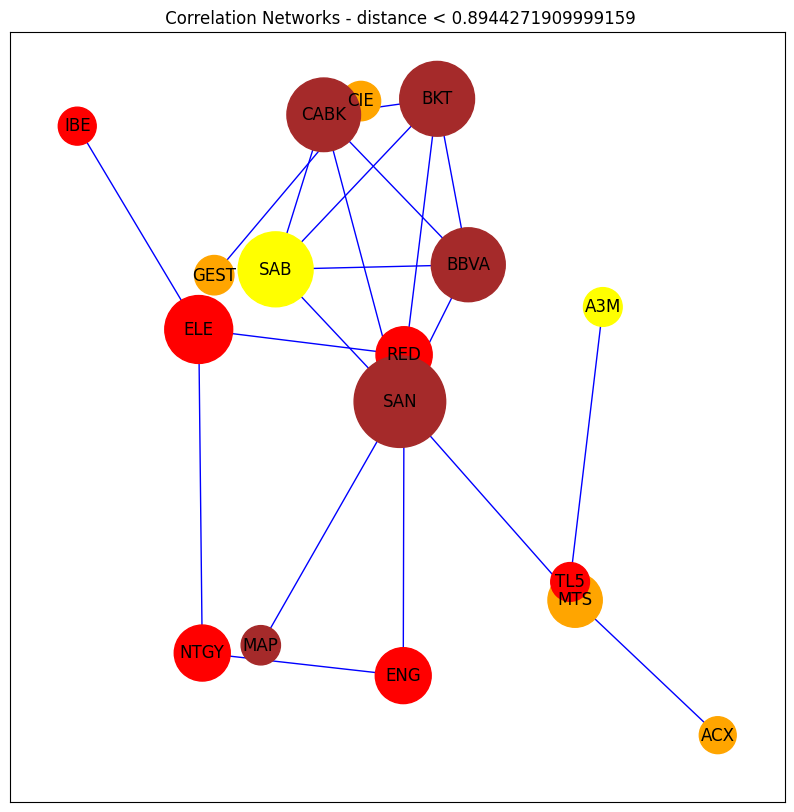

In [22]:
plt.subplots(figsize=(10,10))
nx.draw_networkx_nodes(G_positive, pos, node_size=node_sizes, node_color=node_colors)
nx.draw_networkx_edges(G_positive, pos, edge_color = 'blue')
nx.draw_networkx_labels(G_positive, pos)
plt.title(f" Correlation Networks - distance < {max_distance}")
plt.show()

In [23]:
'''
plt.subplots(figsize=(13,13))

nx.draw_shell(G_positive, pos, with_labels =True, node_color = 'pink',node_size = node_sizes, edge_color = 'purple') #Default node_size = 500

plt.title(f" Correlation Networks - distance < {max_distance}")

plt.show()
'''

'\nplt.subplots(figsize=(13,13))\n\nnx.draw_shell(G_positive, pos, with_labels =True, node_color = \'pink\',node_size = node_sizes, edge_color = \'purple\') #Default node_size = 500\n\nplt.title(f" Correlation Networks - distance < {max_distance}")\n\nplt.show()\n'

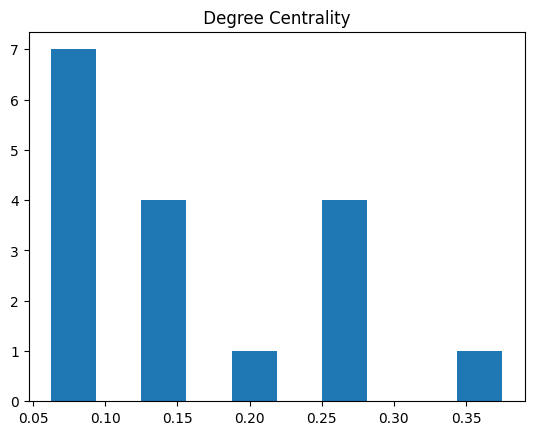

In [24]:
degree_centrality = nx.degree_centrality(G_positive)
plt.figure()
plt.hist(list(degree_centrality.values()))
plt.title(" Degree Centrality ")
plt.show()

In [25]:
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.show()



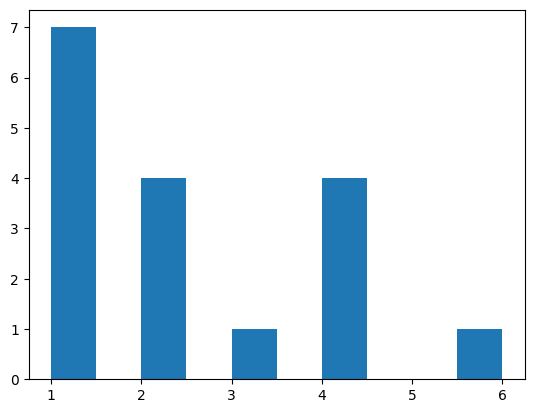

In [26]:
    plot_degree_dist(G_positive)

In [27]:
#Density of Graph

nx.density(G_positive)

0.14705882352941177

In [28]:
#Transitivity of Graph

nx.transitivity(G_positive)

0.6521739130434783